In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/lijunyi/Downloads/bus performance/Rapid_Transit_and_Bus_Prediction_Accuracy_Data.csv")

# Display the first few rows of the dataset
data.head()


,weekly,mode,route_id,bin,arrival_departure,num_predictions,num_accurate_predictions,ObjectId
0,2021/08/13 04:00:00+00,bus,NaN,0-3 min,departure,293039,233562,1
1,2021/08/13 04:00:00+00,bus,NaN,3-6 min,departure,285817,229090,2
2,2021/08/13 04:00:00+00,bus,NaN,6-12 min,departure,561098,472923,3
3,2021/08/13 04:00:00+00,bus,NaN,12-30 min,departure,1594830,1405620,4
4,2021/08/20 04:00:00+00,bus,NaN,0-3 min,departure,285591,228653,5


In [2]:
# Filter the dataset to only include bus data
bus_data = data[data['mode'] == 'bus']

# Check for missing values in each column
missing_values = bus_data.isnull().sum()

missing_values


weekly                        0
mode                          0
route_id                    620
bin                           0
arrival_departure             0
num_predictions               0
num_accurate_predictions      0
ObjectId                      0
dtype: int64

In [3]:
# Fill missing values in 'route_id' with the placeholder "Unknown"
bus_data['route_id'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
missing_after_fill = bus_data['route_id'].isnull().sum()

missing_after_fill


/Users/lijunyi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0

In [4]:
# Convert 'weekly' column to datetime format
bus_data['weekly'] = pd.to_datetime(bus_data['weekly'])

# Verify the data types of the columns
column_data_types = bus_data.dtypes

column_data_types


<ipython-input-4-7bd4cc32bf4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_data['weekly'] = pd.to_datetime(bus_data['weekly'])


weekly                      datetime64[ns, UTC]
mode                                     object
route_id                                 object
bin                                      object
arrival_departure                        object
num_predictions                           int64
num_accurate_predictions                  int64
ObjectId                                  int64
dtype: object

In [5]:
# Calculate accuracy percentage and add it as a new column
bus_data['accuracy_percentage'] = (bus_data['num_accurate_predictions'] / bus_data['num_predictions']) * 100

# Display the first few rows with the new column
bus_data.head()


<ipython-input-5-4046adf02e11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_data['accuracy_percentage'] = (bus_data['num_accurate_predictions'] / bus_data['num_predictions']) * 100


,weekly,mode,route_id,bin,arrival_departure,num_predictions,num_accurate_predictions,ObjectId,accuracy_percentage
0,2021-08-13 04:00:00+00:00,bus,Unknown,0-3 min,departure,293039,233562,1,79.703384
1,2021-08-13 04:00:00+00:00,bus,Unknown,3-6 min,departure,285817,229090,2,80.152685
2,2021-08-13 04:00:00+00:00,bus,Unknown,6-12 min,departure,561098,472923,3,84.285276
3,2021-08-13 04:00:00+00:00,bus,Unknown,12-30 min,departure,1594830,1405620,4,88.136040
4,2021-08-20 04:00:00+00:00,bus,Unknown,0-3 min,departure,285591,228653,5,80.063097


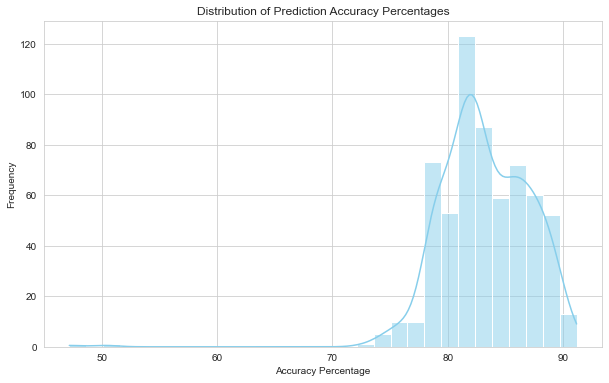

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plot the distribution of accuracy percentages
plt.figure(figsize=(10, 6))
sns.histplot(bus_data['accuracy_percentage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prediction Accuracy Percentages')
plt.xlabel('Accuracy Percentage')
plt.ylabel('Frequency')
plt.show()


 Most of the predictions seem to be clustered around 75% to 90% accuracy, indicating that a significant portion of the bus predictions are fairly accurate.

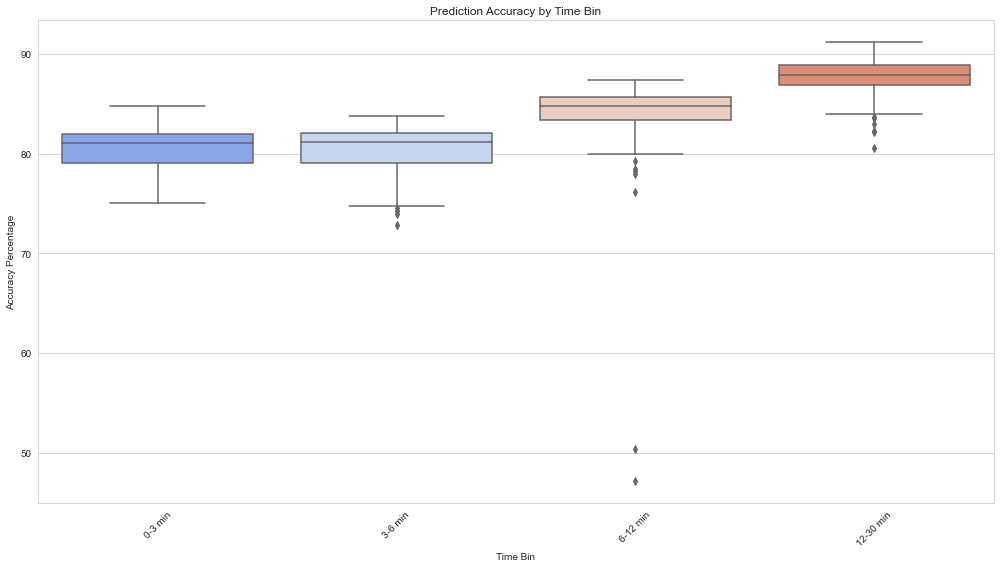

In [7]:
# Boxplot for accuracy percentages by time bin
plt.figure(figsize=(14, 8))
sns.boxplot(x='bin', y='accuracy_percentage', data=bus_data, palette="coolwarm")
plt.title('Prediction Accuracy by Time Bin')
plt.xlabel('Time Bin')
plt.ylabel('Accuracy Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The median accuracy is consistently high across all time bins, hovering around the 80-90% range.
The shorter duration predictions (e.g., "0-3 min" and "3-6 min") have slightly tighter interquartile ranges, indicating more consistent prediction accuracies.
Longer duration predictions (e.g., "12-30 min") have wider interquartile ranges, suggesting more variability in their accuracies.

In [8]:

# Load the new dataset
bus_ridership_data = pd.read_csv("/Users/lijunyi/Downloads/bus performance/MBTA_Bus_Ridership_by_Time_Period%2C_Season%2C_Route_Line%2C_and_Stop.csv")

# Display the first few rows of the dataset
bus_ridership_data.head()


/Users/lijunyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,mode,season,route_id,route_name,route_variant,stop_sequence,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,average_ons,average_offs,average_load,num_trips,ObjectId
0,3,Fall 2016,1,1,1-_-0,23,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ DANA ST,107,0.250,1.09,9.80,10,1
1,3,Fall 2016,1,1,1-_-0,24,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ TROWBRIDG,108,0.070,1.79,8.08,10,2
2,3,Fall 2016,1,1,1-_-0,25,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ BOW ST,109,0.010,1.05,7.04,10,3
3,3,Fall 2016,1,1,1-_-0,26,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ HOLYOKE S,110,0.000,6.62,0.36,10,4
4,3,Fall 2016,1,1,1-_-0,1,0,day_type_01,weekday,time_period_04,MIDDAY_BASE,DUDLEY STATION,64,20.685,0.00,20.99,20,5


In [9]:
# Check for missing values in each column
missing_values_ridership = bus_ridership_data.isnull().sum()

# Check for duplicate rows
duplicate_rows_ridership = bus_ridership_data.duplicated().sum()

missing_values_ridership, duplicate_rows_ridership


(mode                0
 season              0
 route_id            0
 route_name          0
 route_variant       0
 stop_sequence       0
 direction_id        0
 day_type_id         0
 day_type_name       0
 time_period_id      0
 time_period_name    0
 stop_name           0
 stop_id             0
 average_ons         0
 average_offs        0
 average_load        0
 num_trips           0
 ObjectId            0
 dtype: int64,
 0)

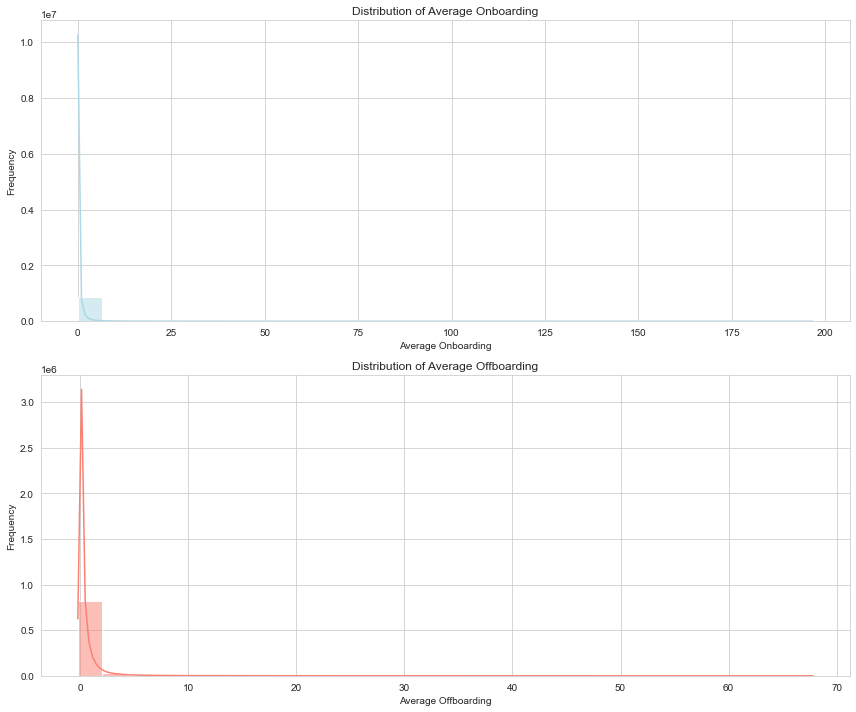

In [10]:
# Plot the distribution of average onboarding and offboarding
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Distribution of average onboarding
sns.histplot(bus_ridership_data['average_ons'], bins=30, kde=True, color='lightblue', ax=ax[0])
ax[0].set_title('Distribution of Average Onboarding')
ax[0].set_xlabel('Average Onboarding')
ax[0].set_ylabel('Frequency')

# Distribution of average offboarding
sns.histplot(bus_ridership_data['average_offs'], bins=30, kde=True, color='salmon', ax=ax[1])
ax[1].set_title('Distribution of Average Offboarding')
ax[1].set_xlabel('Average Offboarding')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Both onboarding and offboarding show right-skewed distributions, indicating that many stops have relatively low ridership, while a few stops experience higher ridership.
The majority of stops have an average onboarding and offboarding count of less than 20 passengers.

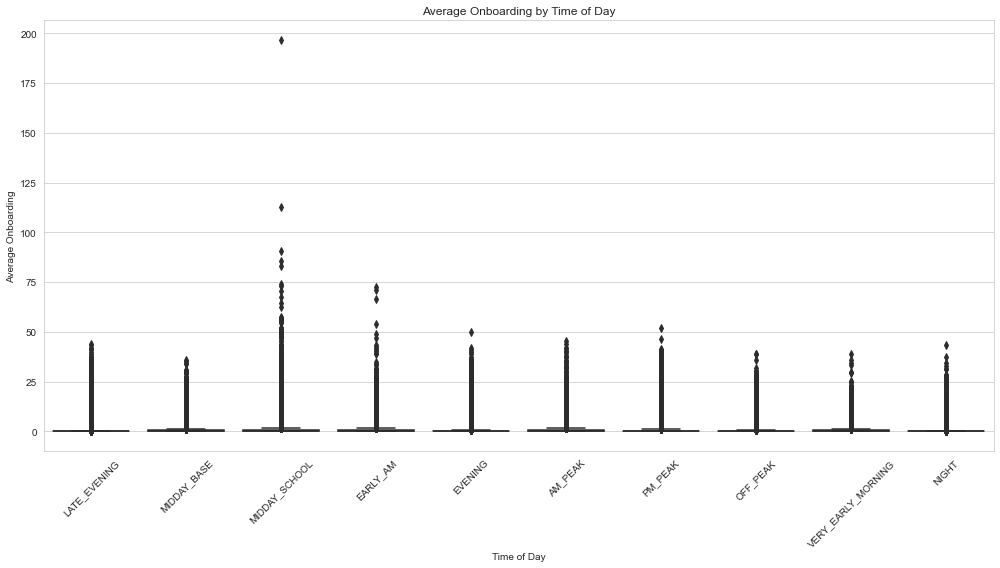

In [11]:
# Boxplot for average onboarding by time of day
plt.figure(figsize=(14, 8))
sns.boxplot(x='time_period_name', y='average_ons', data=bus_ridership_data, palette="viridis")
plt.title('Average Onboarding by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Onboarding')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The "AM_PEAK" time period shows the highest median onboarding, indicating that morning commutes have a high influx of passengers.
The "MIDDAY_BASE" time period also has a relatively high median onboarding, suggesting steady ridership during midday hours.
Time periods like "EARLY_AM" and "LATE_EVENING" have lower medians and narrower interquartile ranges, implying lesser and more consistent ridership during these hours.

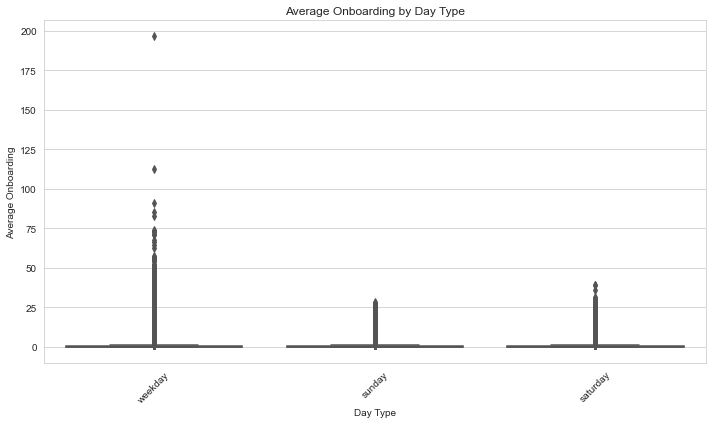

In [12]:
# Boxplot for average onboarding by day type
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_type_name', y='average_ons', data=bus_ridership_data, palette="muted")
plt.title('Average Onboarding by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Average Onboarding')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Weekday: Unsurprisingly, weekdays show the highest median onboarding, indicating that there's a significant influx of passengers on regular working days.
Saturday and Sunday: These days have lower median onboarding compared to weekdays, suggesting reduced bus usage on weekends.

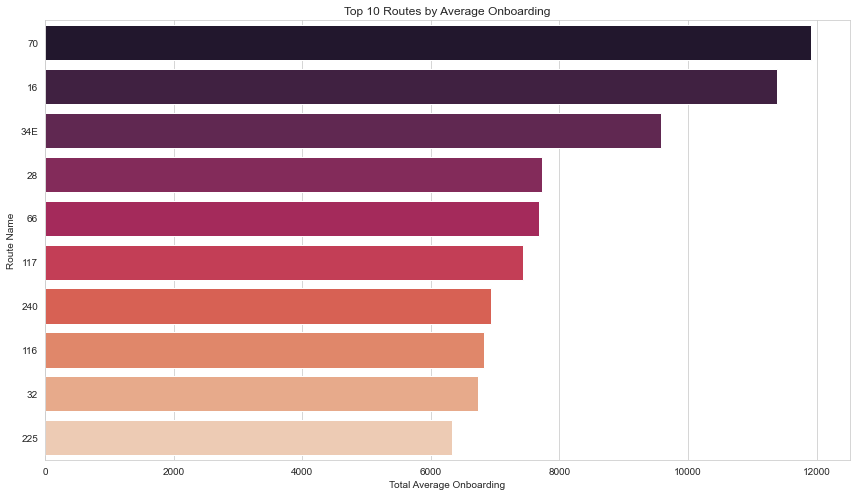

In [13]:
# Group data by route_name and calculate the total average onboarding for each route
top_routes = bus_ridership_data.groupby('route_name')['average_ons'].sum().reset_index()

# Sort the data to get the top 10 routes with highest average onboarding
top_routes = top_routes.sort_values(by='average_ons', ascending=False).head(10)

# Bar plot for top 10 routes based on average onboarding
plt.figure(figsize=(12, 7))
sns.barplot(x='average_ons', y='route_name', data=top_routes, palette="rocket")
plt.title('Top 10 Routes by Average Onboarding')
plt.xlabel('Total Average Onboarding')
plt.ylabel('Route Name')
plt.tight_layout()
plt.show()
